In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('aerofit_treadmill.txt')

In [ ]:
data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
data.size

1620

In [ ]:
data.shape

(180, 9)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [ ]:
data.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


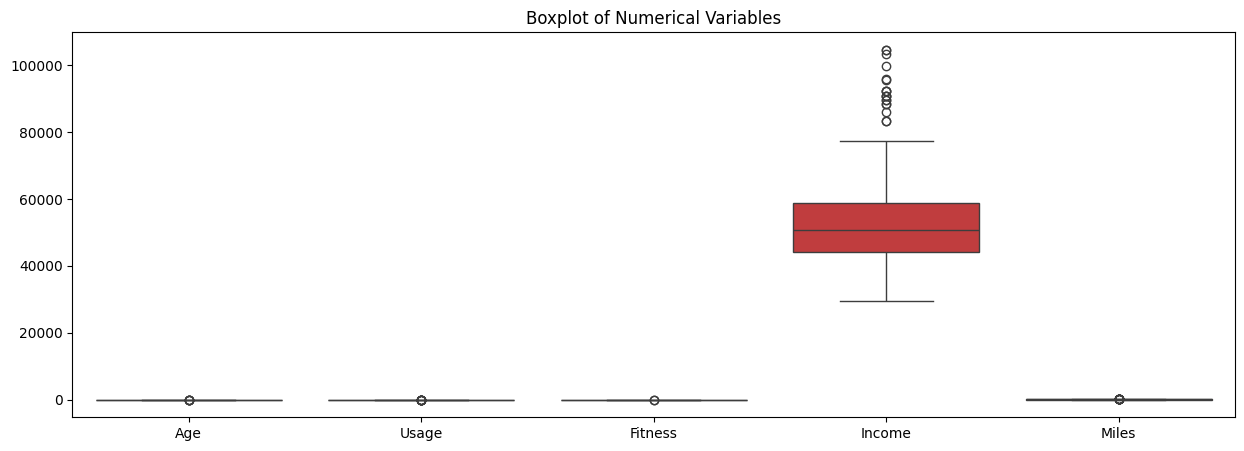

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(data=data[['Age','Usage','Fitness','Income','Miles']])
plt.title("Boxplot of Numerical Variables")
plt.show()

**Key Insights from the Boxplot:**

Income has significant outliers, indicating a small group of high earners compared to the majority.
Other variables (Age, Usage, Fitness, Miles) show less variability, with no major outliers.
Income dominates the scale, making other variables appear compressed.

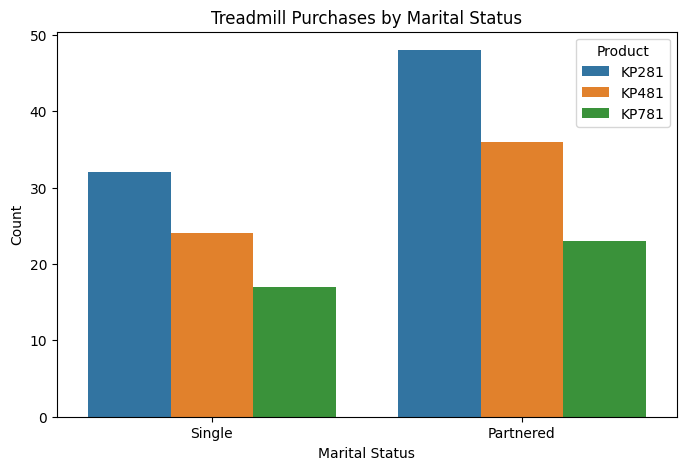

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='MaritalStatus',hue='Product',data=data)
plt.title('Treadmill Purchases by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

**Insights from Treadmill Purchases by Marital Status:**

Partnered customers buy more treadmills than single customers across all models.
KP281 is the most popular choice for both Single and Partnered groups, with a higher preference among Partnered customers.
KP481 shows similar trends, with a moderate increase in sales for Partnered customers.
KP781 has the lowest sales overall, but Partnered customers still purchase slightly more than Singles.

**Recommendations:**

Target Partnered individuals for treadmill promotions, as they show higher purchase intent.
Offer bundled deals for couples to further attract the Partnered segment.
Highlight affordability for Singles, especially for KP281, which is already a preferred option.

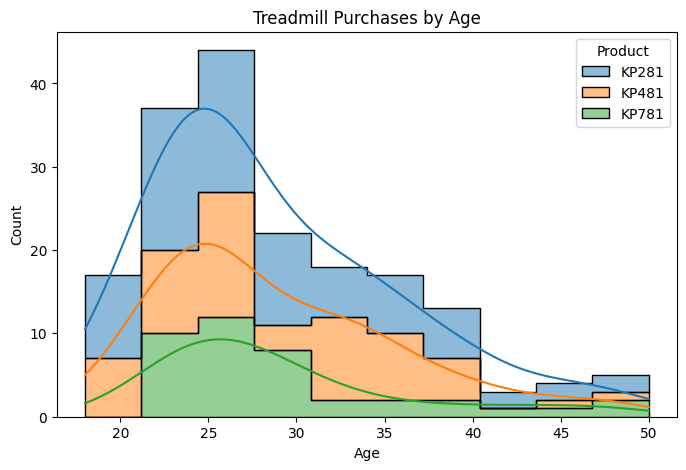

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(data,x='Age',hue='Product',bins=10,kde=True,element="step",multiple='stack')
plt.title('Treadmill Purchases by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

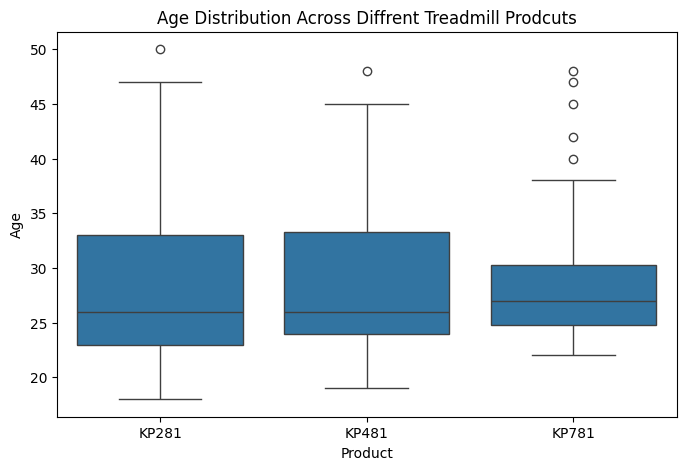

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Product',y='Age',data=data)
plt.title('Age Distribution Across Diffrent Treadmill Prodcuts')
plt.xlabel('Product')
plt.ylabel('Age')
plt.show()


In [ ]:
marginal_prob=data['Product'].value_counts(normalize=True)
marginal_prob

,proportion
Product,
KP281,0.444444
KP481,0.333333
KP781,0.222222


Conditional Probablity

# P(Product | Gender)

In [ ]:
conditional_prob_gender=pd.crosstab(data['Product'],data['Gender'],normalize='columns')

In [ ]:
print("Conditional Probability P(Product | Gender):\n", conditional_prob_gender, "\n")

Conditional Probability P(Product | Gender):
 Gender     Female      Male
Product                    
KP281    0.526316  0.384615
KP481    0.381579  0.298077
KP781    0.092105  0.317308 



# P(Product | Marital Status)

In [ ]:
conditional_prob_marital = pd.crosstab(data["Product"], data["MaritalStatus"], normalize="columns")

In [ ]:
print("Conditional Probability P(Product | Marital Status):\n", conditional_prob_marital, "\n")

Conditional Probability P(Product | Marital Status):
 MaritalStatus  Partnered    Single
Product                           
KP281           0.448598  0.438356
KP481           0.336449  0.328767
KP781           0.214953  0.232877 



# P(Gender | Product)

In [ ]:
conditional_prob_product_gender = pd.crosstab(data["Gender"], data["Product"], normalize="columns")

In [ ]:
print("Conditional Probability P(Gender | Product):\n", conditional_prob_product_gender, "\n")

Conditional Probability P(Gender | Product):
 Product  KP281     KP481  KP781
Gender                         
Female     0.5  0.483333  0.175
Male       0.5  0.516667  0.825 



# P(Marital Status | Product)

In [ ]:
conditional_prob_product_marital = pd.crosstab(data["MaritalStatus"], data["Product"], normalize="columns")

In [ ]:
print("Conditional Probability P(Marital Status | Product):\n", conditional_prob_product_marital, "\n")

Conditional Probability P(Marital Status | Product):
 Product        KP281  KP481  KP781
MaritalStatus                     
Partnered        0.6    0.6  0.575
Single           0.4    0.4  0.425 



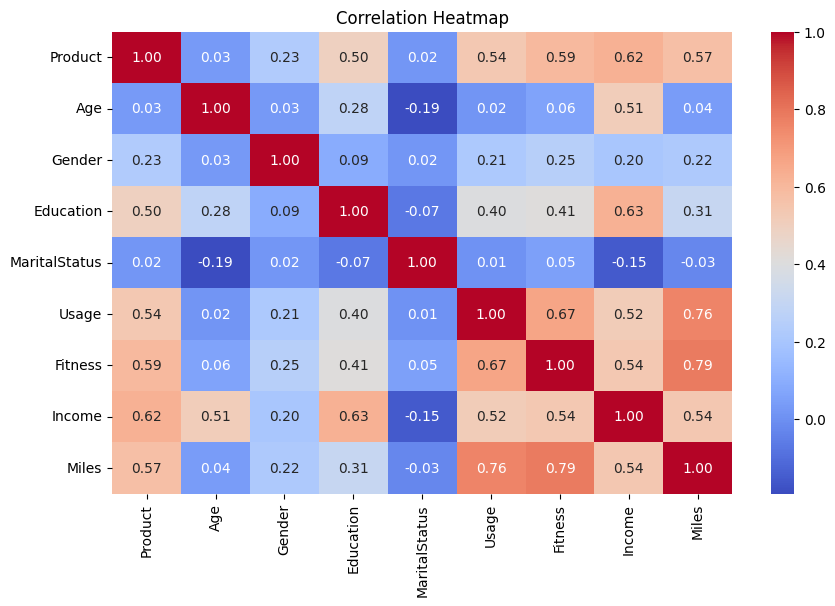

In [ ]:
df_numeric = data.copy()

df_numeric["Product"] = df_numeric["Product"].astype("category").cat.codes
df_numeric["Gender"] = df_numeric["Gender"].astype("category").cat.codes
df_numeric["MaritalStatus"] = df_numeric["MaritalStatus"].astype("category").cat.codes


plt.figure(figsize=(10, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

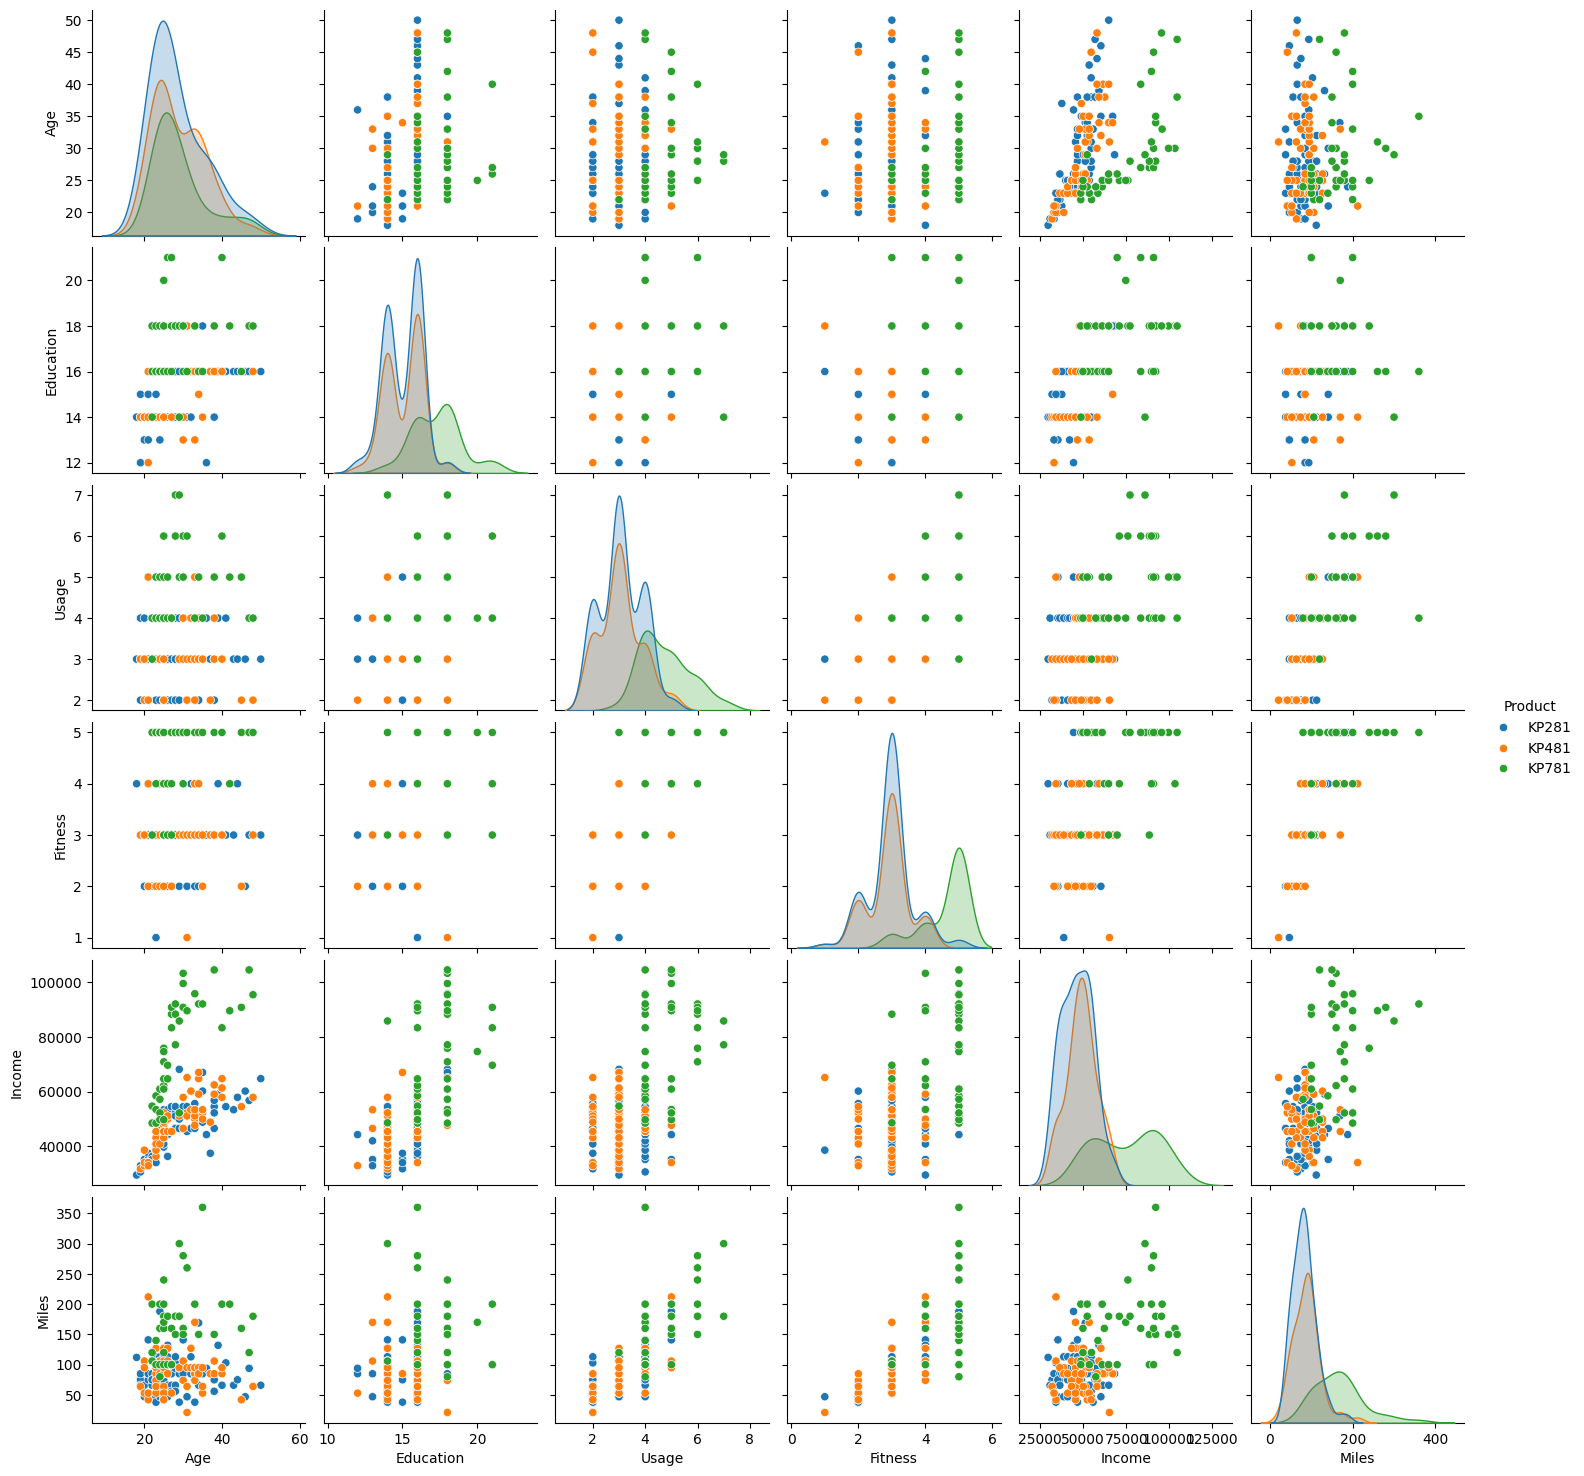

In [ ]:
sns.pairplot(data,hue='Product',diag_kind='kde')
plt.show()

<Figure size 800x600 with 0 Axes>

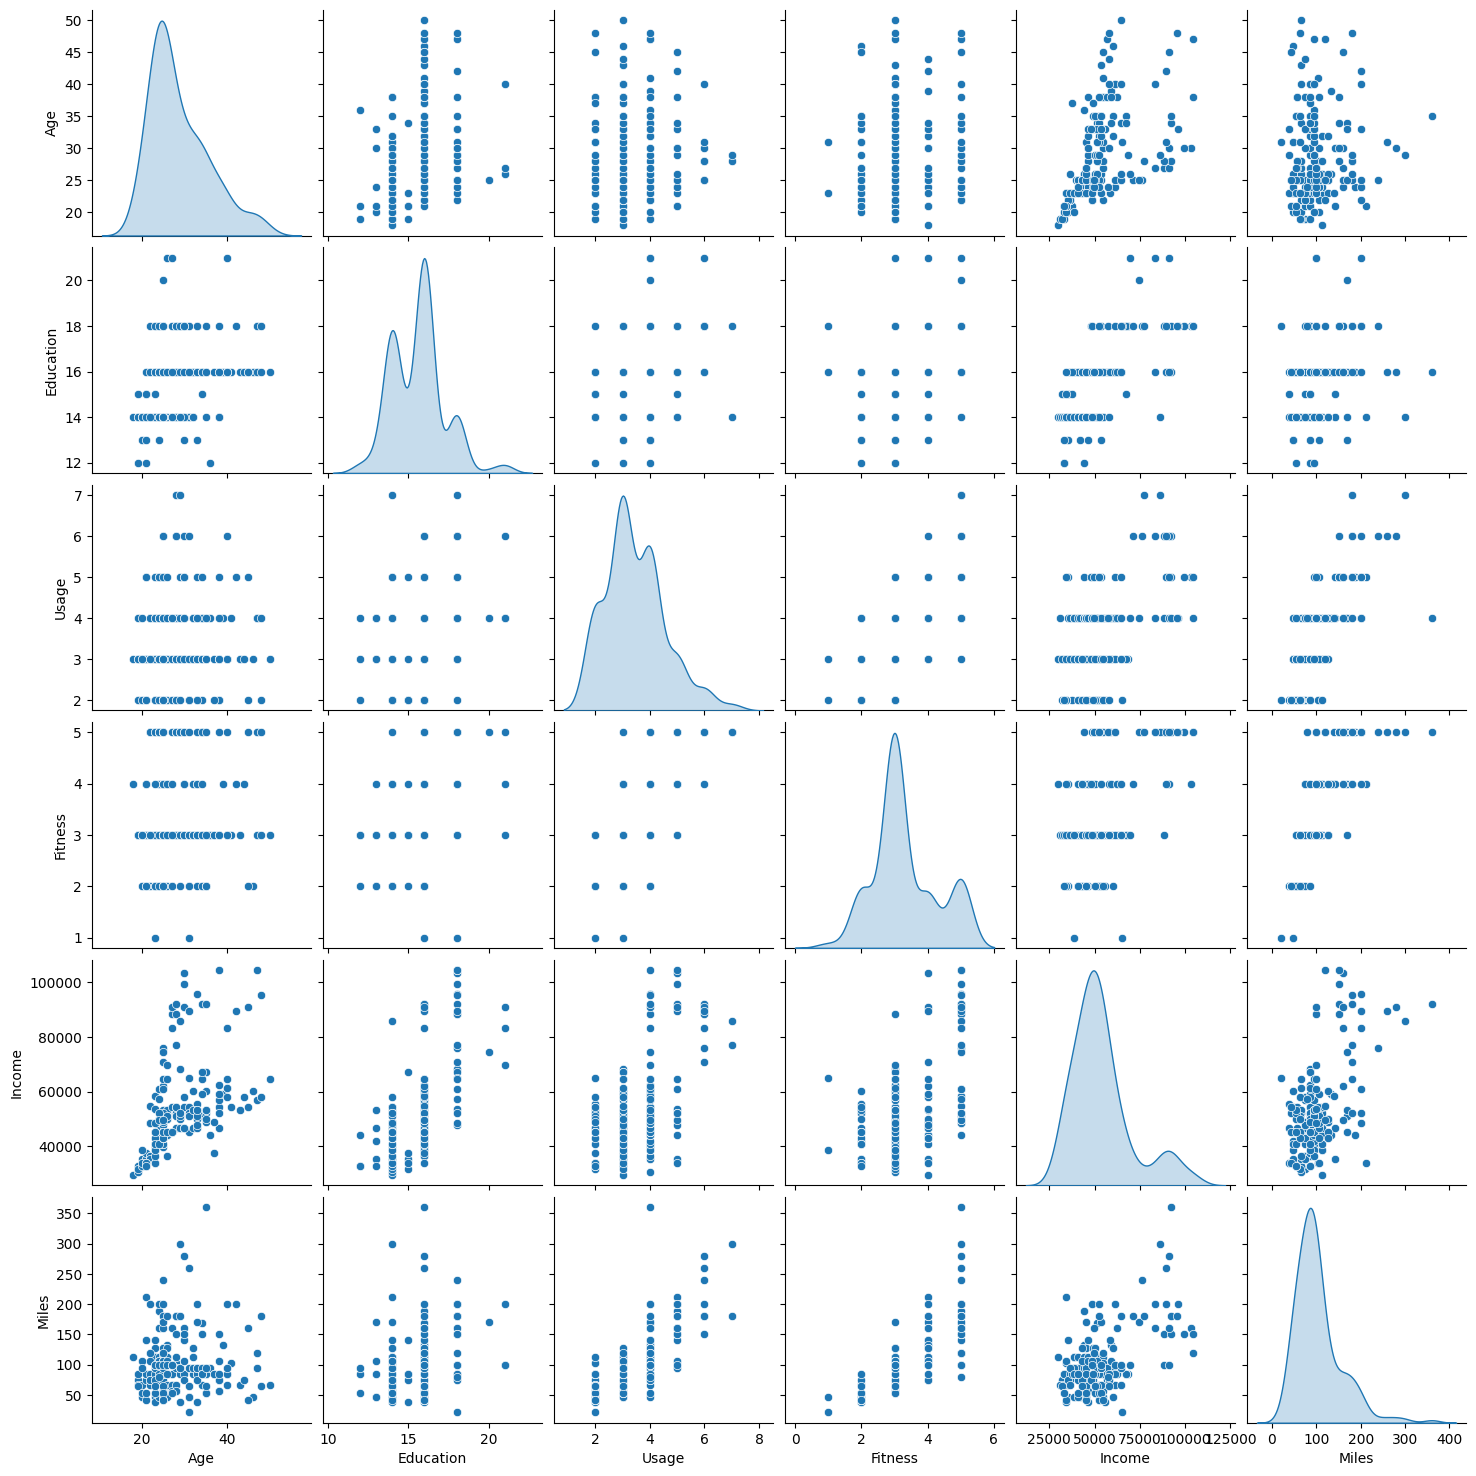

In [ ]:
plt.figure(figsize=(8, 6))
sns.pairplot(data.select_dtypes(include=['int64']),diag_kind='kde')
plt.show()

#Probelem Statement

Analyzing customer purchase behavior for different treadmill models (KP281, KP481, KP781) based on demographic and usage factors. The goal is to identify patterns in customer profiles, detect key influencing factors, and derive actionable insights for targeted marketing and sales strategies.

# Data Overview

The dataset contains 180 entries with the following attributes: Product, Age, Gender, Education, Marital Status, Usage, Fitness, Income, and Miles.

No missing values were found.

Data types: Numerical (Age, Education, Usage, Fitness, Income, Miles), Categorical (Product, Gender, Marital Status).

Conversion of categorical attributes to 'category' where necessary.

# Non-Graphical Analysis

Value counts and unique attributes:

Product: KP281 (44.4%), KP481 (33.3%), KP781 (22.2%).

Gender: Higher male representation.

Marital Status: More partnered customers than single ones.

# Visual Analysis - Univariate & Bivariate

For continuous variables:

Distplots & Histograms: Age distribution skews younger, with peak between 20-30 years.

Countplots: Usage is centered around 3-4 times per week.

Boxplots: Income has significant outliers, mostly in the higher range.

For categorical variables:

Boxplots: Higher income customers prefer KP781, while younger individuals prefer KP281.

For correlation analysis:

Heatmaps & Pairplots: Income correlates with treadmill model preference, fitness level correlates with treadmill usage.